# Loading gender data and libraries

In [2]:
library(MCMCpack) # for wakefield 2004
library(ei) # for king 97
library(eco) # for Strauss 2008

gender_data = read.csv("../data/all_gt_gender.csv")
age_data = read.csv("../data/all_gt_age.csv")
gender_data = gender_data[gender_data$N>100,]
age_data = age_data[age_data$N>100,]

Loading required package: coda
Loading required package: MASS
##
## Markov Chain Monte Carlo Package (MCMCpack)
## Copyright (C) 2003-2016 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park
##
## Support provided by the U.S. National Science Foundation
## (Grants SES-0350646 and SES-0350613)
##
Loading required package: eiPack
Loading required package: msm
eco: Ecological Inference in 2x2 Tables
Version: 3.1-7



# Problem overview

In Ecological Inference we are dealing with the problem of uncovering individual level data from aggregate data. In our case we have agreggated social data on one side and on the other census data informing demographics distribution:



# Functions to calculate metrics of interest

In [3]:
calculateRMSE <- function(predicted,truth){
  rmse <- sqrt( mean( (predicted-truth)^2 , na.rm = TRUE ) )
  return(rmse)
}
calculateMAE <- function(predicted,truth){
  mae <- mean( abs(predicted-truth) , na.rm = TRUE ) 
  return(mae)
}
calculateBias <- function(predicted,truth){
  bias <- mean((predicted-truth) , na.rm = TRUE ) 
  return(bias)
}


# Make predictions using King's solution

In [4]:
dbuf = ei(formula=X ~ Y ,total="N",data=gender_data,truth=cbind(gender_data$W1,gender_data$W2))
predicted_W1_king  <- eiread(dbuf, "betab")
predicted_W2_king  <- eiread(dbuf, "betaw")
cor_W1_king <-cor(predicted_W1_king,gender_data$W1,use="complete")
rmse_W1_king <- cor(predicted_W2_king,gender_data$W2,use="complete")
cor_W2_king <- calculateRMSE(predicted_W1_king,gender_data$W1)
rmse_W2_king <- calculateRMSE(predicted_W2_king,gender_data$W2)

[1] "Running 2x2 ei"


Maximizing likelihood
Importance Sampling..


# Making predictions using Wakefield's solution

In [5]:
n = length(gender_data$Y)
post <- MCMChierEI(gender_data$Y,(1-gender_data$Y),gender_data$X, (1-gender_data$X), 
                   mcmc=500000, burnin= 20000, thin=5, verbose=500000,seed=list(NA, 1))
predicted_W1_wake  <- colMeans(post)[1:n]
predicted_W2_wake  <- colMeans(post)[(n+1):(2*n)]
cor_W1_wake <-cor(predicted_W1_wake,gender_data$W1,use="complete")
rmse_W1_wake <- cor(predicted_W2_wake,gender_data$W2,use="complete")
cor_W2_wake <- calculateRMSE(predicted_W1_wake,gender_data$W1)
rmse_W2_wake <- calculateRMSE(predicted_W2_wake,gender_data$W2)


MCMChierEI iteration 1 of 520000 

MCMChierEI iteration 500001 of 520000 


# Making predictions using Strauss' solution

In [6]:
res.ML <-  eco(X ~ Y, N = N, data = gender_data, context = TRUE, parameter=TRUE,n.draws = 500000, burnin = 20000, thin = 5, verbose = TRUE)
last_pos = length(res.ML$W[,1,1])
predicted_W1_strauss= res.ML$W[last_pos,1,]
predicted_W2_strauss= res.ML$W[last_pos,2,]
cor_W1_strauss <-cor(predicted_W1_strauss,gender_data$W1,use="complete")
rmse_W1_strauss <- cor(predicted_W1_strauss,gender_data$W2,use="complete")
cor_W2_strauss <- calculateRMSE(predicted_W2_strauss,gender_data$W1)
rmse_W2_strauss <- calculateRMSE(predicted_W2_strauss,gender_data$W2)

Starting Gibbs Sampler...
 10 percent done.
 20 percent done.
 30 percent done.
 40 percent done.
 50 percent done.
 60 percent done.
 70 percent done.
 80 percent done.
 90 percent done.
100 percent done.


# Visualizing results

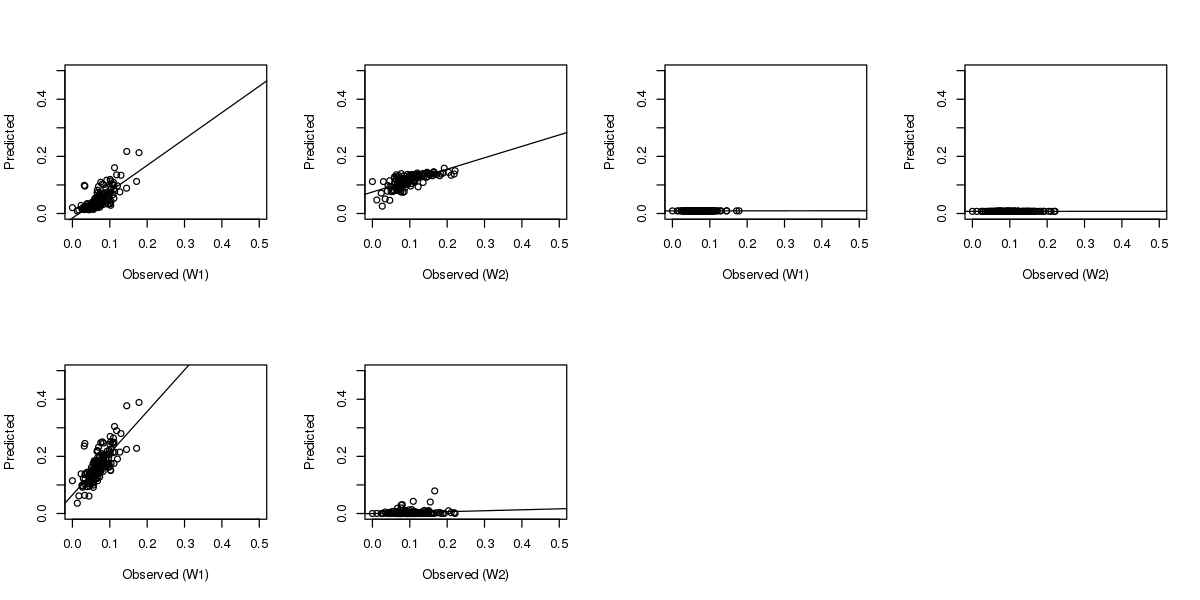

In [7]:
par(mfrow=c(2,4))
options(repr.plot.width=10, repr.plot.height=5)

#plotting kings
regW1 <- lm(predicted_W1_king ~gender_data$W1)
plot(gender_data$W1,predicted_W1_king, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observed (W1)", ylab="Predicted")
abline(regW1)
regW2 <- lm(predicted_W2_king ~gender_data$W2  )
plot(gender_data$W2,predicted_W2_king, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observed (W2)", ylab="Predicted")
abline(regW2)
#plotting wakefield
regW1 <- lm(predicted_W1_wake ~gender_data$W1)
plot(gender_data$W1,predicted_W1_wake, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observed (W1)", ylab="Predicted")
abline(regW1)
regW2 <- lm(predicted_W2_wake ~gender_data$W2  )
plot(gender_data$W2,predicted_W2_wake, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observed (W2)", ylab="Predicted")
abline(regW2)
#plotting strauss
regW1 <- lm(predicted_W1_strauss ~gender_data$W1)
plot(gender_data$W1,predicted_W1_strauss, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observed (W1)", ylab="Predicted")
abline(regW1)
regW2 <- lm(predicted_W2_strauss ~gender_data$W2  )
plot(gender_data$W2,predicted_W2_strauss, xlim = range(0,0.5),ylim=range(0,0.5), xlab="Observed (W2)", ylab="Predicted")
abline(regW2)

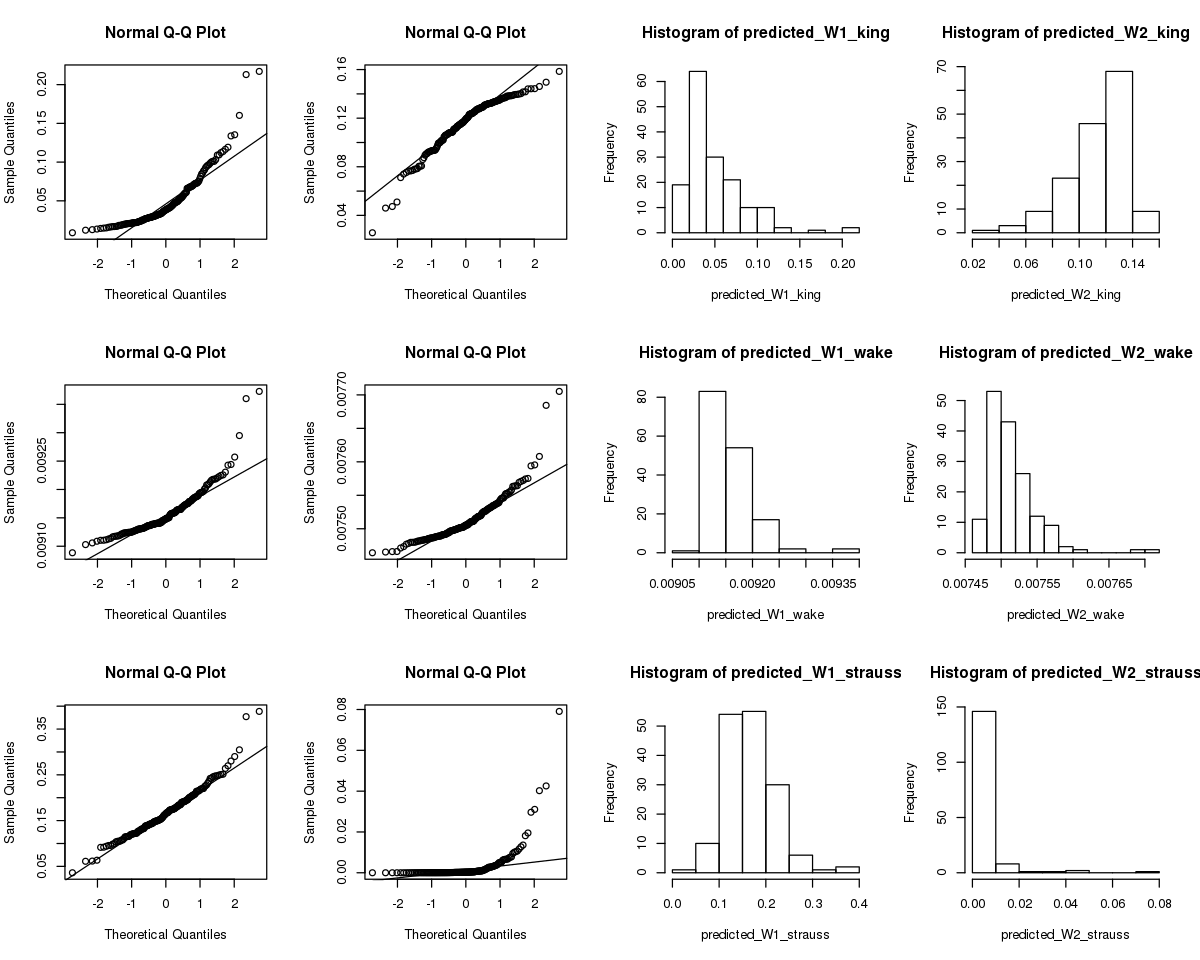

In [23]:
par(mfrow=c(3,4))
options(repr.plot.width=10, repr.plot.height=8)
qqnorm(predicted_W1_king)
qqline(predicted_W1_king)
qqnorm(predicted_W2_king)
qqline(predicted_W2_king)
hist(predicted_W1_king)
hist(predicted_W2_king)

qqnorm(predicted_W1_wake)
qqline(predicted_W1_wake)
qqnorm(predicted_W2_wake)
qqline(predicted_W2_wake)
hist(predicted_W1_wake)
hist(predicted_W2_wake)

qqnorm(predicted_W1_strauss)
qqline(predicted_W1_strauss)
qqnorm(predicted_W2_strauss)
qqline(predicted_W2_strauss)
hist(predicted_W1_strauss)
hist(predicted_W2_strauss)

In [8]:
sprintf("Kings solution")
sprintf("Male cor: %f Female cor: %f", cor_W1_king,rmse_W1_king)
sprintf("Male rmse: %f Female rmse: %f", cor_W2_king,rmse_W2_king)
sprintf("")
sprintf("Wakefields solution")
sprintf("Male cor: %f Female cor: %f", cor_W1_wake,rmse_W1_wake)
sprintf("Male rmse: %f Female rmse: %f", cor_W2_wake,rmse_W2_wake)
sprintf("")
sprintf("Strauss solution")
sprintf("Male cor: %f Female cor: %f", cor_W1_strauss,rmse_W1_strauss)
sprintf("Male rmse: %f Female rmse: %f", cor_W2_strauss,rmse_W2_strauss)

[1] "Kings solution"

[1] "Male cor: 0.741356 Female cor: 0.717100"

[1] "Male rmse: 0.031890 Female rmse: 0.032412"

[1] ""

[1] "Wakefields solution"

[1] "Male cor: 0.755631 Female cor: 0.774540"

[1] "Male rmse: 0.068008 Female rmse: 0.100058"

[1] ""

[1] "Strauss solution"

[1] "Male cor: 0.764413 Female cor: 0.788616"

[1] "Male rmse: 0.073395 Female rmse: 0.103940"